In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
from matplotlib.ticker import ScalarFormatter
from my_plot import set_size
import seaborn as sns
width =  508.0
widthcol = 244
plt.rcParams['font.size']=12
%matplotlib widget

ModuleNotFoundError: No module named 'ipympl'

In [44]:
z1 = np.arange(1e+6,1e+2,5000)
Yn = np.array([0,1,3,5,7,9,11,13,15])
colors = plt.colormaps['jet'].resampled(9)

In [45]:
f =  ScalarFormatter(useOffset=False, useMathText=True)
f.set_scientific(True)
f.set_powerlimits((0, 0))

def sci_notation(x):
    if x == 0:
        return "0"
    else:
        formatted = f"{x:.2e}"  # Converte in notazione scientifica
        coefficient, exponent = formatted.split('e')
        exponent = int(exponent)  # Converti l'esponente a intero
        coefficient=float(coefficient)
        if (coefficient == 1.00):
            return f"$ 10^{{{exponent}}}$"  # Notazione LaTeX
        else: 
            return f"${coefficient} \\times 10^{{{exponent}}}$"  # Notazione LaTeX
    

In [46]:
colors1=sns.color_palette("bright",6) #personal fav 
colors2=sns.color_palette("mako",6) #also nice
colors3 = plt.colormaps['Spectral'].resampled(5)

#Ram's colors, if desired
colors4 = ['#c3121e', '#0348a1', '#ffb01c', '#027608', '#0193b0', '#9c5300', '#949c01', '#7104b5']
#            0sangre,   1neptune,  2pumpkin,  3clover,   4denim,    5cocoa,    6cumin,    7berry

In [47]:
K = 1.380649e-23 # J / K
vc = 299792458 #m / s
h_pl = 6.62607015e-34 #J*s
T = 2.726 #K

In [48]:
G = lambda x: x**4*np.exp(x)/(np.exp(x)-1)**2 * (2*K**3*T**3)/(vc**2*h_pl**2) #intensity not occupation number
Y = lambda x: G(x) * ( x* (np.exp(x)+1)/(np.exp(x)-1)-4 ) 
M = lambda x: G(x)* (0.4561-1.0/x) 


In [49]:
#Analytic estimation of mu distortion taking into connsideration how much energy I have injected
folder1 = 'outputs/fhm-5e5-normal/PDE-non-linear/'
file_path = os.path.join(folder1, f"Greens/Dn_0.delta-z.dat")
op = pd.read_csv(file_path, skiprows= lambda x: x not in [19], delimiter=' ', header=None)
Jbb= op.iat[0,1]
mu = 1.401e-5 * Jbb #by definition in CUSO notes mu = 1.401 * Drho/rho  * Jbb

In [65]:
# import CosmoTherm data
file_path = os.path.join(folder1, "Greens/Dn_0.delta-z.dat")
HC = pd.read_csv(file_path, skiprows=24, delimiter=' ', header=None)
x = HC.iloc[:, 0].values
nu = HC.iloc[:, 1].values
DI = (HC.iloc[:, 4].values)
DI_N = (HC.iloc[:, 5].values)

In [51]:
number = np.trapz(DI_N/x, x)
energy= np.trapz(DI_N, x)

In [52]:
print("Energy integral ", energy)
print("Number integral ", number)

Energy integral  16745.030543554087
Number integral  0.0019164192350444864


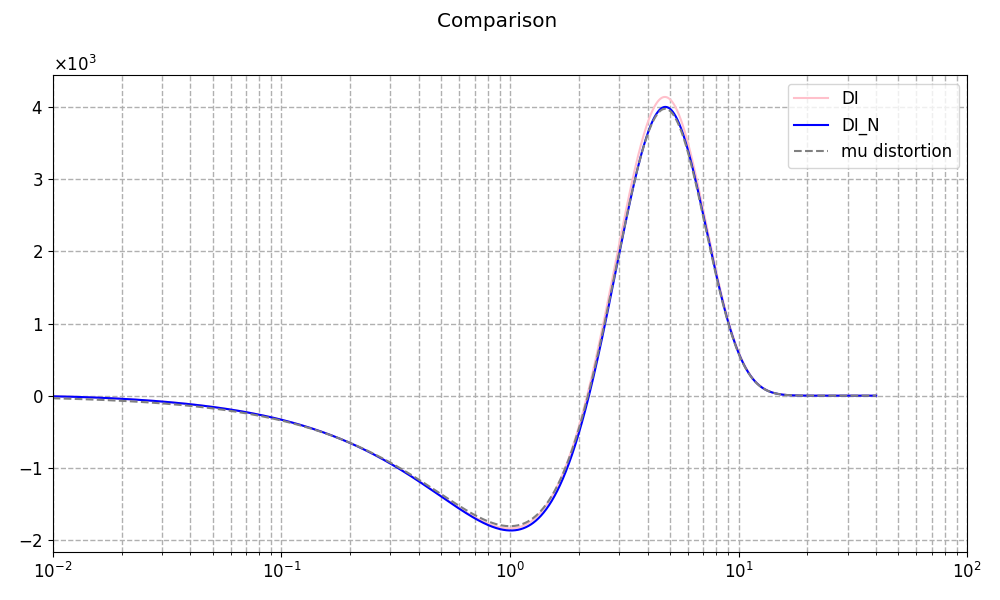

In [53]:
#Comparison CosmoTherm Data with and without temperature shift
fig, ax1 = plt.subplots(1, 1, figsize=(10, 6))
fig.suptitle(f"Comparison ")

#for i in range (len(Yn)):
#    ax1.plot(xynG[i],DIynG[i], label = f"Y{Yn[i]}", color = colors(i))

ax1.plot(x,DI, label = "DI", color= "pink")
ax1.plot(x,DI_N, label = "DI_N", color= "blue")
ax1.plot(x,M(x)*mu*1e26, label = "mu distortion", color = "gray", linestyle = "dashed")

ax1.set_xscale('log')
ax1.set_xlim([1e-2, 1e2])
#ax1.set_ylabel("$\Delta I_{N}$ [Jy/sr]")*
#ax1.set_xlabel("x")
#ax1.set_title("All $\Delta$ I_N curves")
ax1.grid(True, which = 'both',  linestyle='--', linewidth=1)

ax1.legend()



#ax2.set_xscale('log')
##ax2.set_xlim([1e-4, 50])
##ax2.set_ylim([-2.3e-3, 1.1e-2])
##ax2.set_ylabel("$\Delta$ T / T")
##ax2.set_xlabel("x")
#ax2.grid(True, which = 'both',  linestyle='--', linewidth=1)
##ax2.legend()

ax1.yaxis.set_major_formatter(ScalarFormatter())    
ax1.ticklabel_format(axis='y', style='sci', scilimits=(0, 0),useMathText=True) #only y axis, it does not work on the log scale
plt.tight_layout()
plt.show()

In [64]:
#import frequency hierarchy module output
folder2 = 'outputs/fhm-5e5-Imu/'

xyn= []
DIyn= []
for i in range (len(Yn)):
    file_path = os.path.join(folder2, f".dat_ymax{Yn[i]}_y_bg.spec")
    op = pd.read_csv(file_path, skiprows=1, delimiter=' ', header=None)
    
    xyn.append(op.iloc[:, 0].values)
    DIyn.append((op.iloc[:, 1].values)* (2*K**3*T**3)/(vc**2*h_pl**2)*1e26) #unit of measure are different!

nun = np.array(xyn)* K * T /h_pl/1e9
    

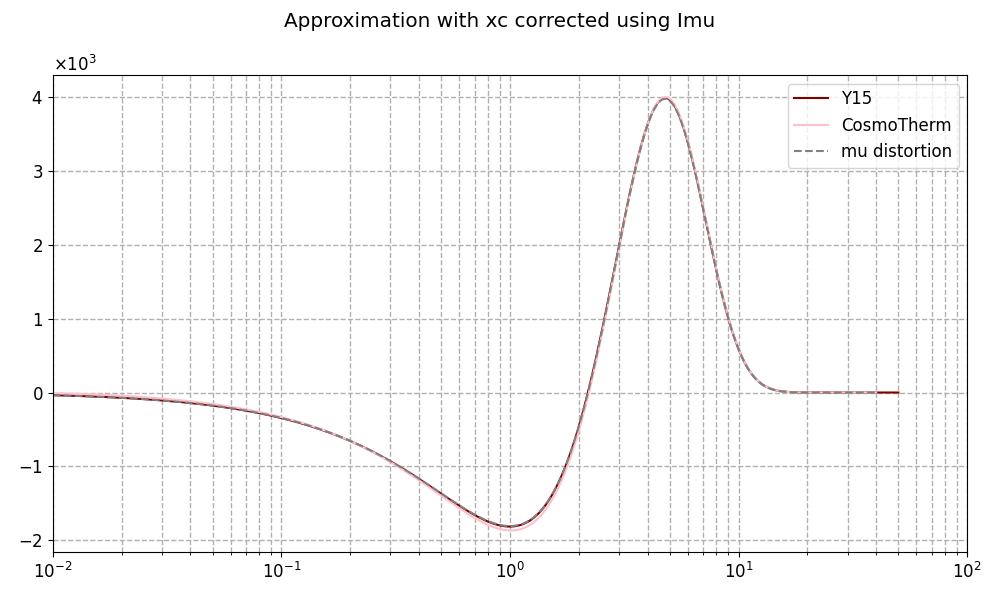

In [55]:

fig, ax1 = plt.subplots(1, 1, figsize=(10, 6))
fig.suptitle(f"Approximation with xc corrected using Imu")

#for i in range (len(Yn)):
ax1.plot(xyn[8],DIyn[8], label = f"Y{Yn[8]}", color = colors(8))


ax1.plot(x,DI_N, label = "CosmoTherm", color= "pink")
ax1.plot(x,M(x)*mu*1e26, label = "mu distortion", color = "gray", linestyle = "dashed")

ax1.set_xscale('log')
ax1.set_xlim([1e-2, 1e2])
#ax1.set_ylabel("$\Delta I_{N}$ [Jy/sr]")*
#ax1.set_xlabel("x")
#ax1.set_title("All $\Delta$ I_N curves")
ax1.grid(True, which = 'both',  linestyle='--', linewidth=1)

ax1.legend()



#ax2.set_xscale('log')
##ax2.set_xlim([1e-4, 50])
##ax2.set_ylim([-2.3e-3, 1.1e-2])
##ax2.set_ylabel("$\Delta$ T / T")
##ax2.set_xlabel("x")
#ax2.grid(True, which = 'both',  linestyle='--', linewidth=1)
##ax2.legend()

ax1.yaxis.set_major_formatter(ScalarFormatter())    
ax1.ticklabel_format(axis='y', style='sci', scilimits=(0, 0),useMathText=True) #only y axis, it does not work on the log scale
plt.tight_layout()
plt.show()

In [63]:
folder3 = 'outputs/fhm-5e5-normal/'

xyn1= []
DIyn1= []
for i in range (len(Yn)):
    file_path = os.path.join(folder3, f".dat_ymax{Yn[i]}_y_bg.spec")
    op = pd.read_csv(file_path, skiprows=1, delimiter=' ', header=None)
    
    xyn1.append(op.iloc[:, 0].values)
    DIyn1.append((op.iloc[:, 1].values)* (2*K**3*T**3)/(vc**2*h_pl**2)*1e26) #unit of measure are different!

nun1 = np.array(xyn1)* K * T /h_pl/1e9

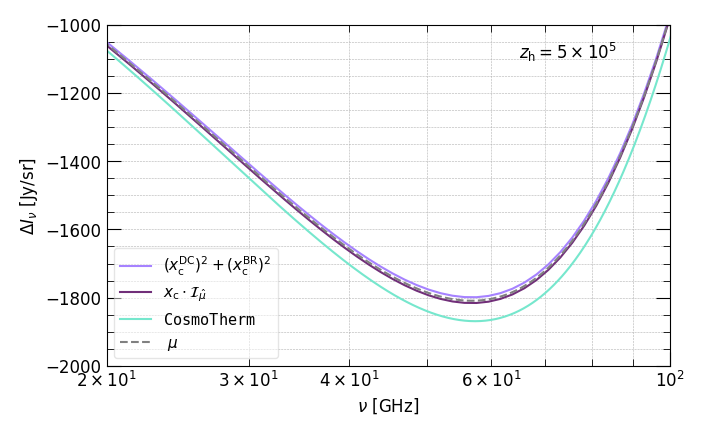

In [90]:
colors4 = ["#a682ff","#712f79","#76e7cd","#e55812","#0e7c7b"]
fig, ax1= plt.subplots( figsize=set_size(width))

ax1.plot(nun1[8],DIyn1[8], label = "$(x_{\\rm c}^{\\rm DC})^2 + (x_{\\rm c}^{\\rm BR})^2$", color = colors4[0])
ax1.plot(nun[8],DIyn[8], label = "$x_{\\rm c} \cdot \mathcal{I}_{\hat{\mu}}  $", color = colors4[1])
ax1.plot(nu,DI_N, label = "${\\tt CosmoTherm}$", color= colors4[2])
ax1.plot(nu,M(x)*mu*1e26, label = " $\mu$", color = "gray", linestyle = "dashed")

ax1.set_xscale('log')
ax1.set_xlim([2e1, 1e2])
ax1.set_ylim([-2000, -1000])

plt.minorticks_on()
plt.tick_params(direction='in',right=True, top=True)
plt.tick_params(labelsize=12)
plt.tick_params(labelbottom=True, labeltop=False, labelright=False, labelleft=True)
plt.tick_params(direction='in',which='minor', length=5, bottom=True, top=True, left=True, right=True)
plt.tick_params(direction='in',which='major', length=10, bottom=True, top=True, left=True, right=True)

ax1.set_ylabel("$\Delta I_{\\nu}$ [Jy/sr]")
ax1.set_xlabel("$\\nu$ [GHz]")

ax1.text(6.5e1,-1100, "$z_{\\rm h} = 5 \\times 10^5$")
ax1.grid(True, which = 'both',  linestyle='--', linewidth=0.4)
ax1.legend(fontsize = 11,fancybox=True, framealpha=0.5)
plt.tight_layout()

plt.savefig('outputs/p4p/fhm-5e5-corrected.pdf', dpi=300,bbox_inches="tight")

plt.show()

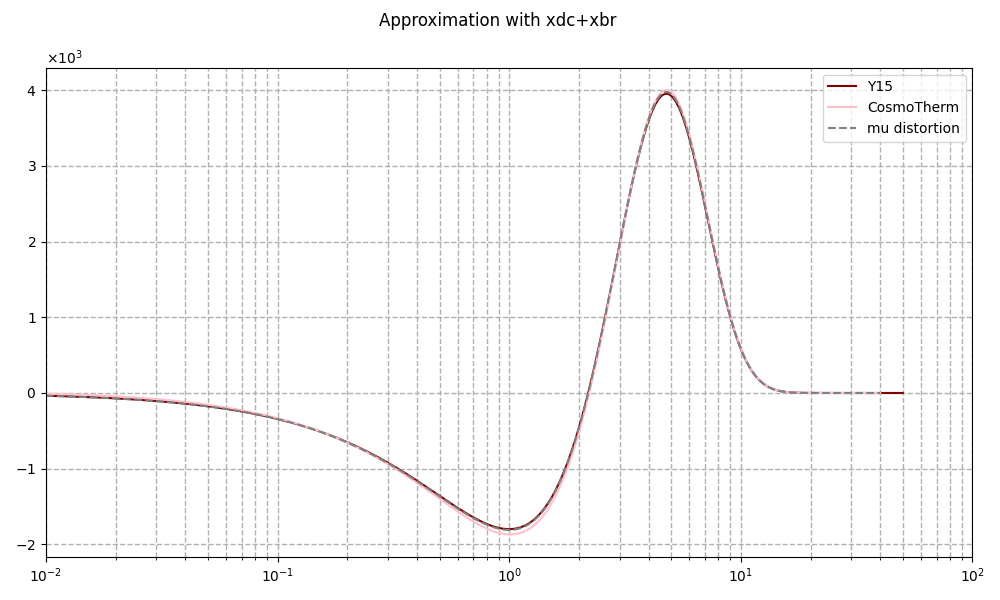

In [ ]:
fig, ax1 = plt.subplots(1, 1, figsize=(10, 6))
fig.suptitle(f"Approximation with xdc+xbr ")

#for i in range (len(Yn)):
ax1.plot(xyn1[8],DIyn1[8], label = f"Y{Yn[8]}", color = colors(i))
ax1.plot(xyn[8],DIyn[8], label = f"Y{Yn[8]}", color = colors(8))
ax1.plot(x,DI_N, label = "CosmoTherm", color= "pink")
ax1.plot(x,M(x)*mu*1e26, label = "mu distortion", color = "gray", linestyle = "dashed")

ax1.set_xscale('log')
ax1.set_xlim([1e-2, 1e2])
#ax1.set_ylabel("$\Delta I_{N}$ [Jy/sr]")*
#ax1.set_xlabel("x")
#ax1.set_title("All $\Delta$ I_N curves")
ax1.grid(True, which = 'both',  linestyle='--', linewidth=1)

ax1.legend()



#ax2.set_xscale('log')
##ax2.set_xlim([1e-4, 50])
##ax2.set_ylim([-2.3e-3, 1.1e-2])
##ax2.set_ylabel("$\Delta$ T / T")
##ax2.set_xlabel("x")
#ax2.grid(True, which = 'both',  linestyle='--', linewidth=1)
##ax2.legend()

ax1.yaxis.set_major_formatter(ScalarFormatter())    
ax1.ticklabel_format(axis='y', style='sci', scilimits=(0, 0),useMathText=True) #only y axis, it does not work on the log scale
plt.tight_layout()
plt.show()

In [ ]:
folder4 = 'outputs/fhm-5e5-xdc/'

xyn2= []
DIyn2= []
for i in range (len(Yn)):
    file_path = os.path.join(folder4, f".dat_ymax{Yn[i]}_y_bg.spec")
    op = pd.read_csv(file_path, skiprows=1, delimiter=' ', header=None)
    
    xyn2.append(op.iloc[:, 0].values)
    DIyn2.append((op.iloc[:, 1].values)* (2*K**3*T**3)/(vc**2*h_pl**2)*1e26) #unit of measure are different!

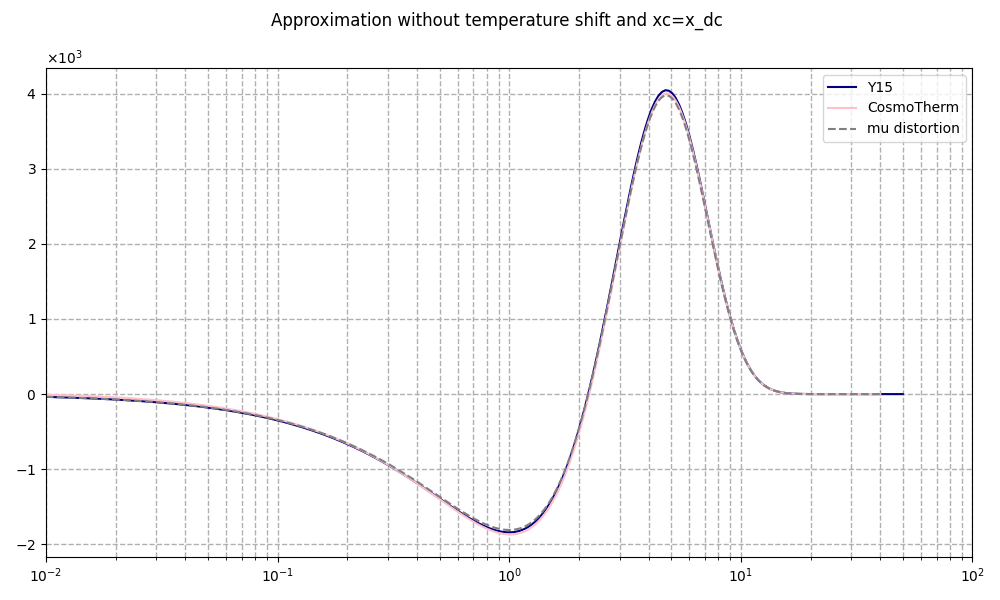

In [ ]:
fig, ax1 = plt.subplots(1, 1, figsize=(10, 6))
fig.suptitle(f"Approximation without temperature shift and xc=x_dc ")

#for i in range (len(Yn)):
ax1.plot(xyn2[8],DIyn2[8], label = f"Y{Yn[8]}", color = colors(0))

ax1.plot(x,DI_N, label = "CosmoTherm", color= "pink")
ax1.plot(x,M(x)*mu*1e26, label = "mu distortion", color = "gray", linestyle = "dashed")

ax1.set_xscale('log')
ax1.set_xlim([1e-2, 1e2])
#ax1.set_ylabel("$\Delta I_{N}$ [Jy/sr]")*
#ax1.set_xlabel("x")
#ax1.set_title("All $\Delta$ I_N curves")
ax1.grid(True, which = 'both',  linestyle='--', linewidth=1)

ax1.legend()



#ax2.set_xscale('log')
##ax2.set_xlim([1e-4, 50])
##ax2.set_ylim([-2.3e-3, 1.1e-2])
##ax2.set_ylabel("$\Delta$ T / T")
##ax2.set_xlabel("x")
#ax2.grid(True, which = 'both',  linestyle='--', linewidth=1)
##ax2.legend()

ax1.yaxis.set_major_formatter(ScalarFormatter())    
ax1.ticklabel_format(axis='y', style='sci', scilimits=(0, 0),useMathText=True) #only y axis, it does not work on the log scale
plt.tight_layout()
plt.show()

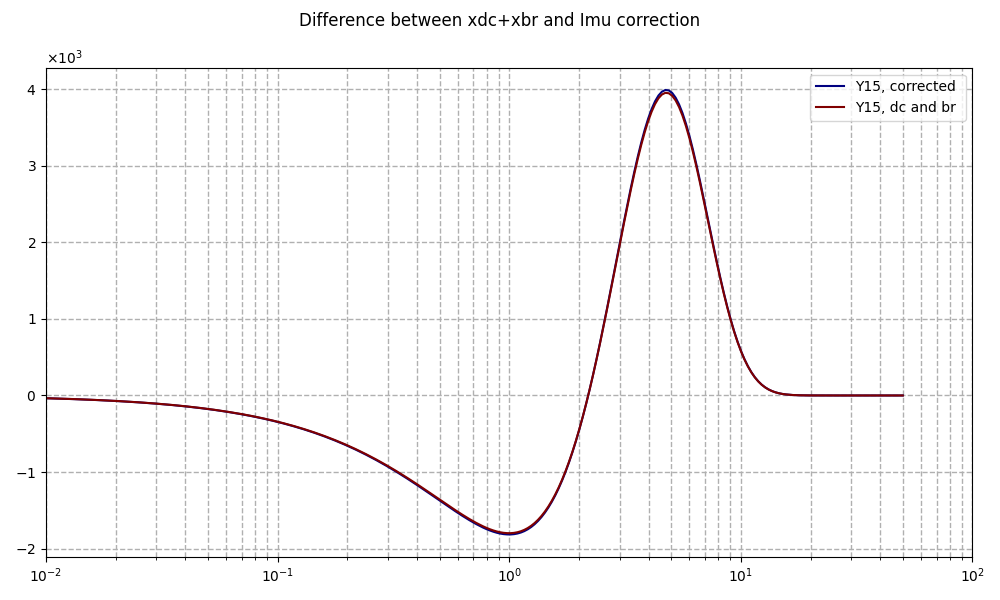

In [ ]:
fig, ax1 = plt.subplots(1, 1, figsize=(10, 6))
fig.suptitle(f"Difference between xdc+xbr and Imu correction")


ax1.plot(xyn[8],DIyn[8], label = f"Y{Yn[i]}, corrected ", color = colors(0))
ax1.plot(xyn[8],DIyn1[8], label = f"Y{Yn[i]}, dc and br", color = colors(8))

#ax1.plot(x,DI_N, label = "CosmoTherm", color= "pink")
#ax1.plot(x,M(x)*mu*1e26, label = "mu distortion", color = "gray", linestyle = "dashed")

ax1.set_xscale('log')
ax1.set_xlim([1e-2, 1e2])
#ax1.set_ylabel("$\Delta I_{N}$ [Jy/sr]")*
#ax1.set_xlabel("x")
#ax1.set_title("All $\Delta$ I_N curves")
ax1.grid(True, which = 'both',  linestyle='--', linewidth=1)

ax1.legend()



#ax2.set_xscale('log')
##ax2.set_xlim([1e-4, 50])
##ax2.set_ylim([-2.3e-3, 1.1e-2])
##ax2.set_ylabel("$\Delta$ T / T")
##ax2.set_xlabel("x")
#ax2.grid(True, which = 'both',  linestyle='--', linewidth=1)
##ax2.legend()

ax1.yaxis.set_major_formatter(ScalarFormatter())    
ax1.ticklabel_format(axis='y', style='sci', scilimits=(0, 0),useMathText=True) #only y axis, it does not work on the log scale
plt.tight_layout()
plt.show()

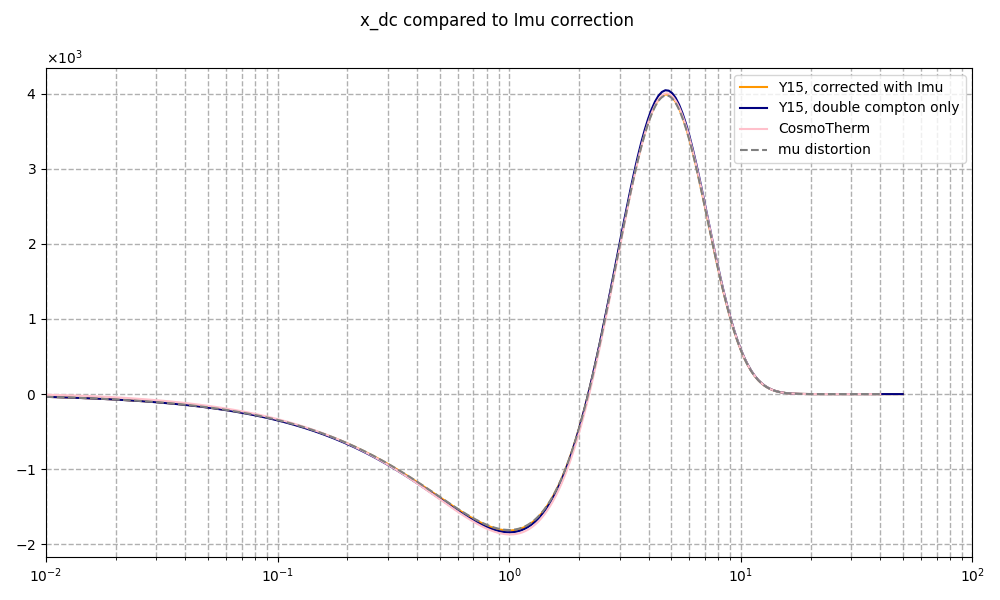

In [ ]:
fig, ax1 = plt.subplots(1, 1, figsize=(10, 6))
fig.suptitle(f"x_dc compared to Imu correction ")

ax1.plot(xyn[8],DIyn[8], label = f"Y{Yn[8]}, corrected with Imu", color = colors(6))
ax1.plot(xyn2[8],DIyn2[8], label = f"Y{Yn[8]}, double compton only", color = colors(0))
ax1.plot(x,DI_N, label = "CosmoTherm", color= "pink")
ax1.plot(x,M(x)*mu*1e26, label = "mu distortion", color = "gray", linestyle = "dashed")

ax1.set_xscale('log')
ax1.set_xlim([1e-2, 1e2])
#ax1.set_ylabel("$\Delta I_{N}$ [Jy/sr]")*
#ax1.set_xlabel("x")
#ax1.set_title("All $\Delta$ I_N curves")
ax1.grid(True, which = 'both',  linestyle='--', linewidth=1)

ax1.legend()



#ax2.set_xscale('log')
##ax2.set_xlim([1e-4, 50])
##ax2.set_ylim([-2.3e-3, 1.1e-2])
##ax2.set_ylabel("$\Delta$ T / T")
##ax2.set_xlabel("x")
#ax2.grid(True, which = 'both',  linestyle='--', linewidth=1)
##ax2.legend()

ax1.yaxis.set_major_formatter(ScalarFormatter())    
ax1.ticklabel_format(axis='y', style='sci', scilimits=(0, 0),useMathText=True) #only y axis, it does not work on the log scale
plt.tight_layout()
plt.show()

In [ ]:
folder2_3 = 'outputs/fhm-1e6-Imu/'

xyn_1e6= []
DIyn_1e6= []
for i in range (len(Yn)):
    file_path = os.path.join(folder2_3, f".dat_ymax{Yn[i]}_y_bg.spec")
    op = pd.read_csv(file_path, skiprows=1, delimiter=' ', header=None)
    
    xyn_1e6.append(op.iloc[:, 0].values)
    DIyn_1e6.append((op.iloc[:, 1].values)* (2*K**3*T**3)/(vc**2*h_pl**2)*1e26) #unit of measure are different!

In [ ]:
folder2_1 = 'outputs/fhm-4e5-Imu/'

xyn_4e5= []
DIyn_4e5= []
for i in range (len(Yn)):
    file_path = os.path.join(folder2_1, f".dat_ymax{Yn[i]}_y_bg.spec")
    op = pd.read_csv(file_path, skiprows=1, delimiter=' ', header=None)
    
    xyn_4e5.append(op.iloc[:, 0].values)
    DIyn_4e5.append((op.iloc[:, 1].values)* (2*K**3*T**3)/(vc**2*h_pl**2)*1e26) #unit of measure are different!

In [ ]:
folder2_2 = 'outputs/fhm-8e5-Imu/'

xyn_8e5= []
DIyn_8e5= []
for i in range (len(Yn)):
    file_path = os.path.join(folder2_2, f".dat_ymax{Yn[i]}_y_bg.spec")
    op = pd.read_csv(file_path, skiprows=1, delimiter=' ', header=None)
    
    xyn_8e5.append(op.iloc[:, 0].values)
    DIyn_8e5.append((op.iloc[:, 1].values)* (2*K**3*T**3)/(vc**2*h_pl**2)*1e26) #unit of measure are different!

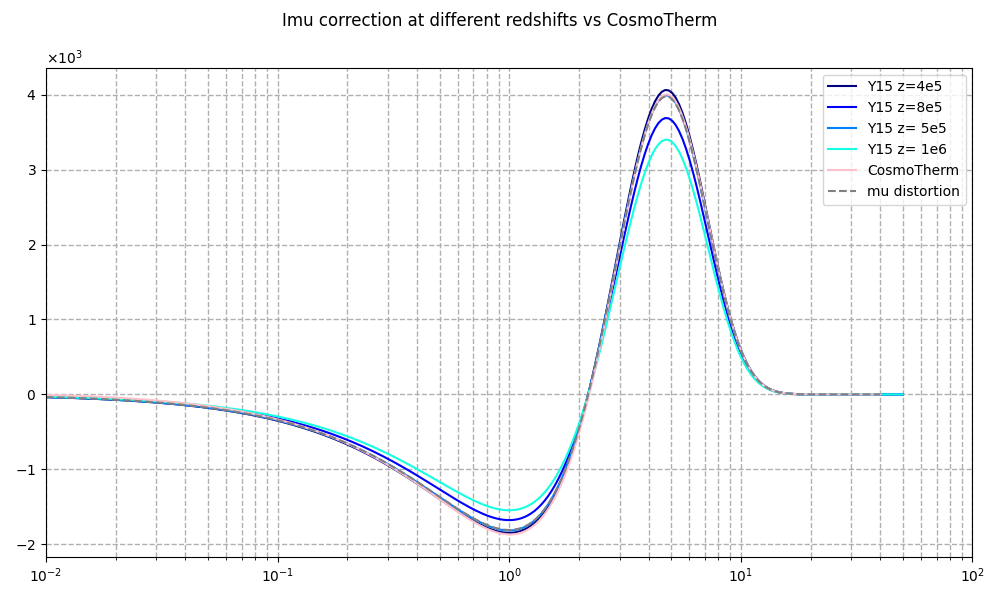

In [ ]:
fig, ax1 = plt.subplots(1, 1, figsize=(10, 6))
fig.suptitle(f"Imu correction at different redshifts vs CosmoTherm")

ax1.plot(xyn_4e5[8],DIyn_4e5[8], label = f"Y{Yn[8]} z=4e5", color = colors(0))
ax1.plot(xyn_8e5[8],DIyn_8e5[8], label = f"Y{Yn[8]} z=8e5", color = colors(1))
ax1.plot(xyn[8],DIyn[8], label = f"Y{Yn[8]} z= 5e5", color = colors(2))
ax1.plot(xyn_1e6[8],DIyn_1e6[8], label = f"Y{Yn[8]} z= 1e6", color = colors(3))

ax1.plot(x,DI_N, label = "CosmoTherm", color= "pink")
ax1.plot(x,M(x)*mu*1e26, label = "mu distortion", color = "gray", linestyle = "dashed")

ax1.set_xscale('log')
ax1.set_xlim([1e-2, 1e2])
#ax1.set_ylabel("$\Delta I_{N}$ [Jy/sr]")*
#ax1.set_xlabel("x")
#ax1.set_title("All $\Delta$ I_N curves")
ax1.grid(True, which = 'both',  linestyle='--', linewidth=1)

ax1.legend()



#ax2.set_xscale('log')
##ax2.set_xlim([1e-4, 50])
##ax2.set_ylim([-2.3e-3, 1.1e-2])
##ax2.set_ylabel("$\Delta$ T / T")
##ax2.set_xlabel("x")
#ax2.grid(True, which = 'both',  linestyle='--', linewidth=1)
##ax2.legend()

ax1.yaxis.set_major_formatter(ScalarFormatter())    
ax1.ticklabel_format(axis='y', style='sci', scilimits=(0, 0),useMathText=True) #only y axis, it does not work on the log scale
plt.tight_layout()
plt.show()

In [ ]:
#import frequency hierarchy module output


file_path = os.path.join(folder2_3, "PDE-non-linear/Greens/Dn_0.delta-z.dat")
HC = pd.read_csv(file_path, skiprows=24, delimiter=' ', header=None)
x_1e6 = HC.iloc[:, 0].values
DI_N_1e6 = (HC.iloc[:, 5].values)

In [ ]:
#import frequency hierarchy module output


file_path = os.path.join(folder2_1, "PDE-non-linear/Greens/Dn_0.delta-z.dat")
HC = pd.read_csv(file_path, skiprows=24, delimiter=' ', header=None)
x_4e5 = HC.iloc[:, 0].values
DI_N_4e5 = (HC.iloc[:, 5].values)

In [ ]:
#import frequency hierarchy module output


file_path = os.path.join(folder2_2, "PDE-non-linear/Greens/Dn_0.delta-z.dat")
HC = pd.read_csv(file_path, skiprows=24, delimiter=' ', header=None)
x_8e5 = HC.iloc[:, 0].values
DI_N_8e5 = (HC.iloc[:, 5].values)

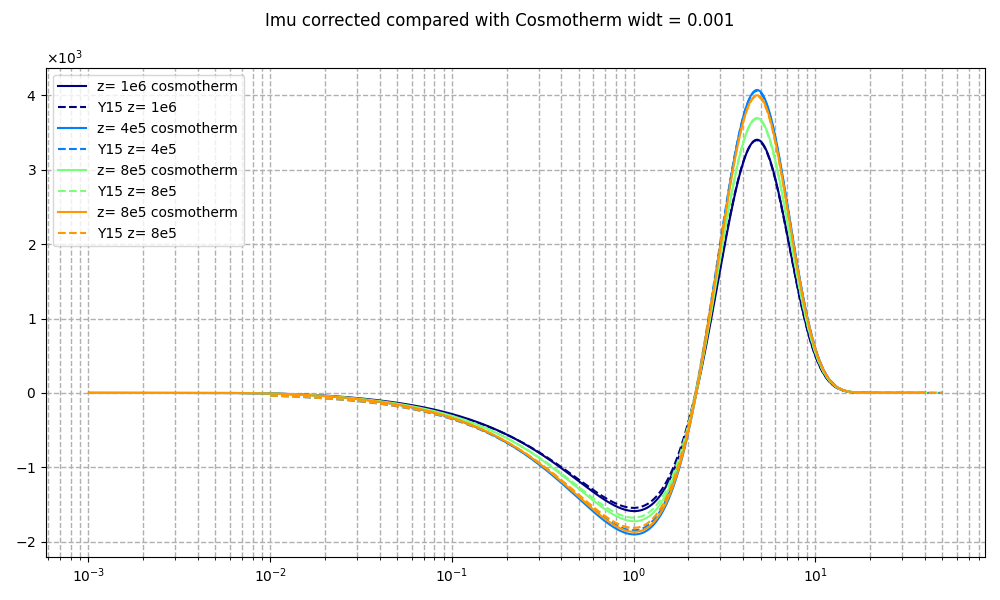

In [ ]:
fig, ax1 = plt.subplots(1, 1, figsize=(10, 6))
fig.suptitle(f"Imu corrected compared with Cosmotherm widt = 0.001")

ax1.plot(x_1e6,DI_N_1e6, label = f"z= 1e6 cosmotherm", color = colors(0))
ax1.plot(xyn_1e6[8],DIyn_1e6[8], label = f"Y{Yn[8]} z= 1e6", color = colors(0), linestyle = "dashed")

ax1.plot(x_4e5,DI_N_4e5, label = f"z= 4e5 cosmotherm", color = colors(2))
ax1.plot(xyn_4e5[8],DIyn_4e5[8], label = f"Y{Yn[8]} z= 4e5", color = colors(2), linestyle = "dashed")

ax1.plot(x_8e5,DI_N_8e5, label = f"z= 8e5 cosmotherm", color = colors(4))
ax1.plot(xyn_8e5[8],DIyn_8e5[8], label = f"Y{Yn[8]} z= 8e5", color = colors(4), linestyle = "dashed")

ax1.plot(x,DI_N, label = f"z= 8e5 cosmotherm", color = colors(6))
ax1.plot(xyn[8],DIyn[8], label = f"Y{Yn[8]} z= 8e5", color = colors(6), linestyle = "dashed")



#ax1.plot(x,DI_N, label = "CosmoTherm", color= "pink")
#ax1.plot(x,M(x)*mu*1e26, label = "mu distortion", color = "gray", linestyle = "dashed")

ax1.set_xscale('log')
#ax1.set_xlim([1e-2, 1e2])
#ax1.set_ylabel("$\Delta I_{N}$ [Jy/sr]")*
#ax1.set_xlabel("x")
#ax1.set_title("All $\Delta$ I_N curves")
ax1.grid(True, which = 'both',  linestyle='--', linewidth=1)

ax1.legend()



#ax2.set_xscale('log')
##ax2.set_xlim([1e-4, 50])
##ax2.set_ylim([-2.3e-3, 1.1e-2])
##ax2.set_ylabel("$\Delta$ T / T")
##ax2.set_xlabel("x")
#ax2.grid(True, which = 'both',  linestyle='--', linewidth=1)
##ax2.legend()

ax1.yaxis.set_major_formatter(ScalarFormatter())    
ax1.ticklabel_format(axis='y', style='sci', scilimits=(0, 0),useMathText=True) #only y axis, it does not work on the log scale
plt.tight_layout()
plt.show()

In [ ]:
#import frequency hierarchy module output


xyn_1e6_001= []
DIyn_1e6_001= []
for i in range (len(Yn)):
    file_path = os.path.join(folder2_3, f"0.01/.dat_ymax{Yn[i]}_y_bg.spec")
    op = pd.read_csv(file_path, skiprows=1, delimiter=' ', header=None)
    
    xyn_1e6_001.append(op.iloc[:, 0].values)
    DIyn_1e6_001.append((op.iloc[:, 1].values)* (2*K**3*T**3)/(vc**2*h_pl**2)*1e26) #unit of measure are different!

In [ ]:
xyn_4e5_001= []
DIyn_4e5_001= []
for i in range (len(Yn)):
    file_path = os.path.join(folder2_1, f"0.01/.dat_ymax{Yn[i]}_y_bg.spec")
    op = pd.read_csv(file_path, skiprows=1, delimiter=' ', header=None)
    
    xyn_4e5_001.append(op.iloc[:, 0].values)
    DIyn_4e5_001.append((op.iloc[:, 1].values)* (2*K**3*T**3)/(vc**2*h_pl**2)*1e26) #unit of measure are different!

In [ ]:
xyn_8e5_001= []
DIyn_8e5_001= []
for i in range (len(Yn)):
    file_path = os.path.join(folder2_2, f"0.01/.dat_ymax{Yn[i]}_y_bg.spec")
    op = pd.read_csv(file_path, skiprows=1, delimiter=' ', header=None)
    
    xyn_8e5_001.append(op.iloc[:, 0].values)
    DIyn_8e5_001.append((op.iloc[:, 1].values)* (2*K**3*T**3)/(vc**2*h_pl**2)*1e26) #unit of measure are different!

In [ ]:
xyn_5e5_001= []
DIyn_5e5_001= []
for i in range (len(Yn)):
    file_path = os.path.join(folder2, f"0.01/.dat_ymax{Yn[i]}_y_bg.spec")
    op = pd.read_csv(file_path, skiprows=1, delimiter=' ', header=None)
    
    xyn_5e5_001.append(op.iloc[:, 0].values)
    DIyn_5e5_001.append((op.iloc[:, 1].values)* (2*K**3*T**3)/(vc**2*h_pl**2)*1e26) #unit of measure are different!

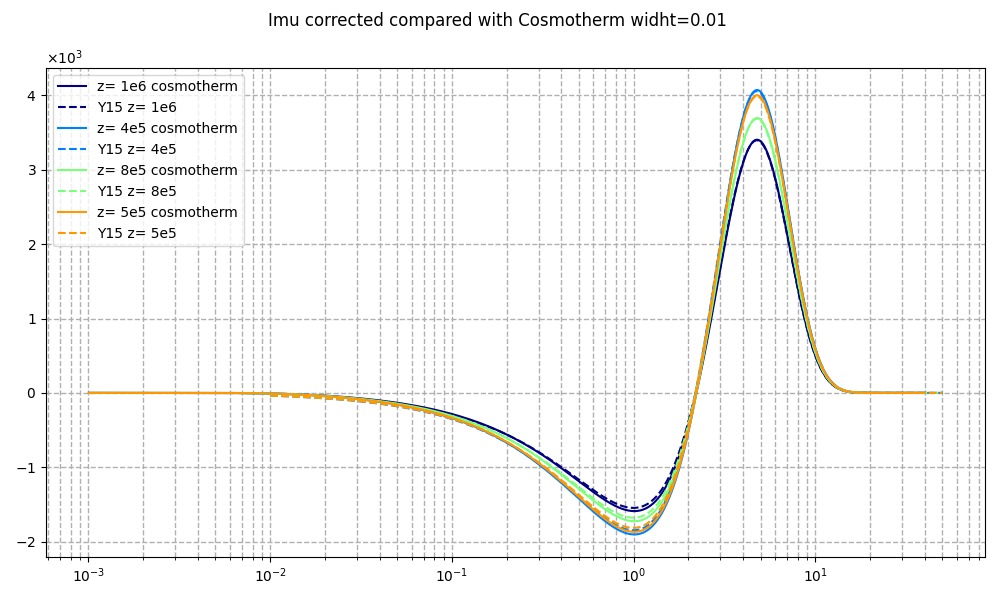

In [ ]:
fig, ax1 = plt.subplots(1, 1, figsize=(10, 6))
fig.suptitle(f"Imu corrected compared with Cosmotherm widht=0.01 ")

ax1.plot(x_1e6,DI_N_1e6, label = f"z= 1e6 cosmotherm", color = colors(0))
ax1.plot(xyn_1e6_001[8],DIyn_1e6_001[8], label = f"Y{Yn[8]} z= 1e6", color = colors(0), linestyle = "dashed")

ax1.plot(x_4e5,DI_N_4e5, label = f"z= 4e5 cosmotherm", color = colors(2))
ax1.plot(xyn_4e5_001[8],DIyn_4e5_001[8], label = f"Y{Yn[8]} z= 4e5", color = colors(2), linestyle = "dashed")

ax1.plot(x_8e5,DI_N_8e5, label = f"z= 8e5 cosmotherm", color = colors(4))
ax1.plot(xyn_8e5_001[8],DIyn_8e5_001[8], label = f"Y{Yn[8]} z= 8e5", color = colors(4), linestyle = "dashed")

ax1.plot(x,DI_N, label = f"z= 5e5 cosmotherm", color = colors(6))
ax1.plot(xyn_5e5_001[8],DIyn_5e5_001[8], label = f"Y{Yn[8]} z= 5e5", color = colors(6), linestyle = "dashed")



#ax1.plot(x,DI_N, label = "CosmoTherm", color= "pink")
#ax1.plot(x,M(x)*mu*1e26, label = "mu distortion", color = "gray", linestyle = "dashed")

ax1.set_xscale('log')
#ax1.set_xlim([1e-2, 1e2])
#ax1.set_ylabel("$\Delta I_{N}$ [Jy/sr]")*
#ax1.set_xlabel("x")
#ax1.set_title("All $\Delta$ I_N curves")
ax1.grid(True, which = 'both',  linestyle='--', linewidth=1)

ax1.legend()



#ax2.set_xscale('log')
##ax2.set_xlim([1e-4, 50])
##ax2.set_ylim([-2.3e-3, 1.1e-2])
##ax2.set_ylabel("$\Delta$ T / T")
##ax2.set_xlabel("x")
#ax2.grid(True, which = 'both',  linestyle='--', linewidth=1)
##ax2.legend()

ax1.yaxis.set_major_formatter(ScalarFormatter())    
ax1.ticklabel_format(axis='y', style='sci', scilimits=(0, 0),useMathText=True) #only y axis, it does not work on the log scale
plt.tight_layout()
plt.show()

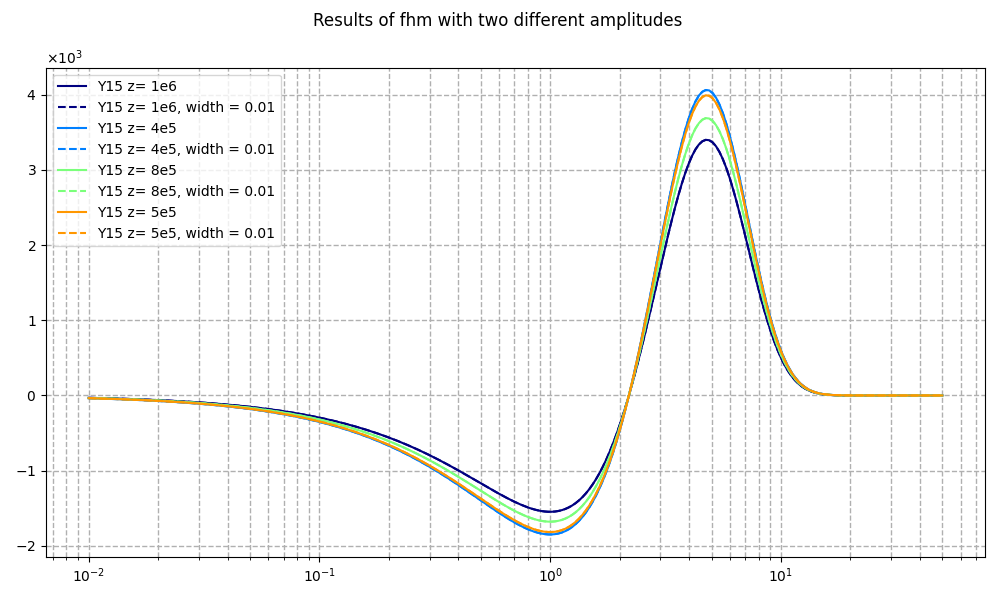

In [ ]:
fig, ax1 = plt.subplots(1, 1, figsize=(10, 6))
fig.suptitle(f"Results of fhm with two different amplitudes ")

ax1.plot(xyn_1e6[8],DIyn_1e6[8], label = f"Y{Yn[8]} z= 1e6", color = colors(0))
ax1.plot(xyn_1e6_001[8],DIyn_1e6_001[8], label = f"Y{Yn[8]} z= 1e6, width = 0.01", color = colors(0), linestyle = "dashed")

ax1.plot(xyn_4e5[8],DIyn_4e5[8], label = f"Y{Yn[8]} z= 4e5", color = colors(2))
ax1.plot(xyn_4e5_001[8],DIyn_4e5_001[8], label = f"Y{Yn[8]} z= 4e5, width = 0.01", color = colors(2), linestyle = "dashed")

ax1.plot(xyn_8e5[8],DIyn_8e5[8], label = f"Y{Yn[8]} z= 8e5", color = colors(4))
ax1.plot(xyn_8e5_001[8],DIyn_8e5_001[8], label = f"Y{Yn[8]} z= 8e5, width = 0.01", color = colors(4), linestyle = "dashed")

ax1.plot(xyn[8],DIyn[8], label = f"Y{Yn[8]} z= 5e5", color = colors(6))
ax1.plot(xyn_5e5_001[8],DIyn_5e5_001[8], label = f"Y{Yn[8]} z= 5e5, width = 0.01", color = colors(6), linestyle = "dashed")



#ax1.plot(x,DI_N, label = "CosmoTherm", color= "pink")
#ax1.plot(x,M(x)*mu*1e26, label = "mu distortion", color = "gray", linestyle = "dashed")

ax1.set_xscale('log')
#ax1.set_xlim([1e-2, 1e2])
#ax1.set_ylabel("$\Delta I_{N}$ [Jy/sr]")*
#ax1.set_xlabel("x")
#ax1.set_title("All $\Delta$ I_N curves")
ax1.grid(True, which = 'both',  linestyle='--', linewidth=1)

ax1.legend()



#ax2.set_xscale('log')
##ax2.set_xlim([1e-4, 50])
##ax2.set_ylim([-2.3e-3, 1.1e-2])
##ax2.set_ylabel("$\Delta$ T / T")
##ax2.set_xlabel("x")
#ax2.grid(True, which = 'both',  linestyle='--', linewidth=1)
##ax2.legend()

ax1.yaxis.set_major_formatter(ScalarFormatter())    
ax1.ticklabel_format(axis='y', style='sci', scilimits=(0, 0),useMathText=True) #only y axis, it does not work on the log scale
plt.tight_layout()
plt.show()

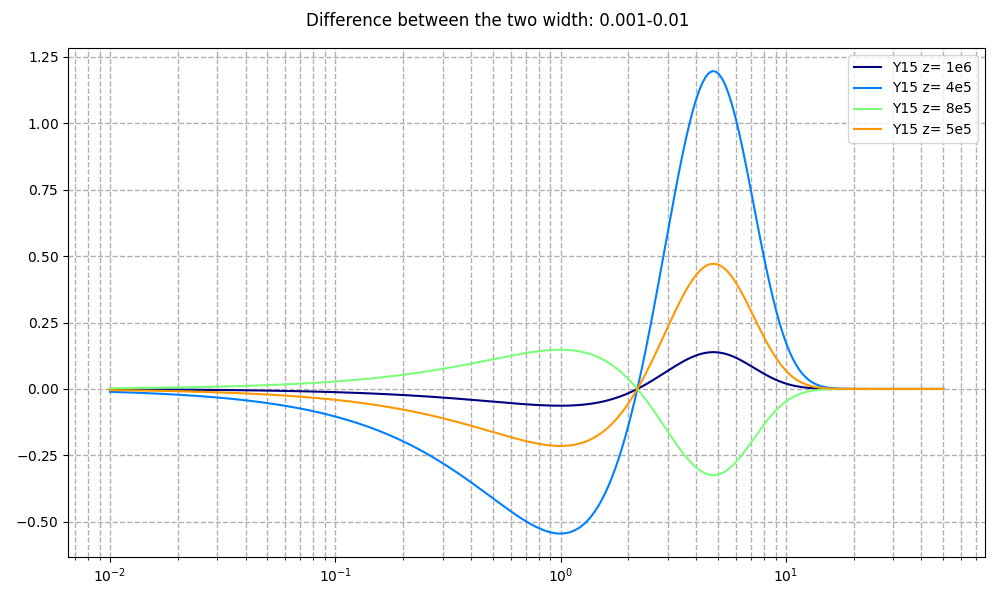

In [ ]:
fig, ax1 = plt.subplots(1, 1, figsize=(10, 6))
fig.suptitle(f"Difference between the two width: 0.001-0.01 ")

ax1.plot(xyn_1e6[8],DIyn_1e6[8]-DIyn_1e6_001[8], label = f"Y{Yn[8]} z= 1e6", color = colors(0))

ax1.plot(xyn_4e5[8],DIyn_4e5[8]-DIyn_4e5_001[8], label = f"Y{Yn[8]} z= 4e5", color = colors(2))

ax1.plot(xyn_8e5[8],DIyn_8e5[8]-DIyn_8e5_001[8], label = f"Y{Yn[8]} z= 8e5", color = colors(4))

ax1.plot(xyn[8],DIyn[8]-DIyn_5e5_001[8], label = f"Y{Yn[8]} z= 5e5", color = colors(6))



#ax1.plot(x,DI_N, label = "CosmoTherm", color= "pink")
#ax1.plot(x,M(x)*mu*1e26, label = "mu distortion", color = "gray", linestyle = "dashed")

ax1.set_xscale('log')
#ax1.set_xlim([1e-2, 1e2])
#ax1.set_ylabel("$\Delta I_{N}$ [Jy/sr]")*
#ax1.set_xlabel("x")
#ax1.set_title("All $\Delta$ I_N curves")
ax1.grid(True, which = 'both',  linestyle='--', linewidth=1)

ax1.legend()



#ax2.set_xscale('log')
##ax2.set_xlim([1e-4, 50])
##ax2.set_ylim([-2.3e-3, 1.1e-2])
##ax2.set_ylabel("$\Delta$ T / T")
##ax2.set_xlabel("x")
#ax2.grid(True, which = 'both',  linestyle='--', linewidth=1)
##ax2.legend()

ax1.yaxis.set_major_formatter(ScalarFormatter())    
ax1.ticklabel_format(axis='y', style='sci', scilimits=(0, 0),useMathText=True) #only y axis, it does not work on the log scale
plt.tight_layout()
plt.show()

In [ ]:
folder5 = 'outputs/fhm-refined/5e5-old2/' 
xyn_15= []
DIyn_15= []

#for i in range (len(Yn)):
file_path = os.path.join(folder5, f".dat_ymax15_y_bg.spec")
op = pd.read_csv(file_path, skiprows=1, delimiter=' ', header=None)

xyn_15.append(op.iloc[:, 0].values)
DIyn_15.append((op.iloc[:, 1].values)* (2*K**3*T**3)/(vc**2*h_pl**2)*1e26) #unit of measure are different!

In [ ]:
folder6 = 'outputs/fhm-refined/5e5-heating2/' 
xyn_15_heat= []
DIyn_15_heat= []

#for i in range (len(Yn)):
file_path = os.path.join(folder6, f".dat_ymax15_y_bg.spec")
op = pd.read_csv(file_path, skiprows=1, delimiter=' ', header=None)

xyn_15_heat.append(op.iloc[:, 0].values)
DIyn_15_heat.append((op.iloc[:, 1].values)* (2*K**3*T**3)/(vc**2*h_pl**2)*1e26) #unit of measure are different!

In [ ]:
folder6 = 'outputs/fhm-refined/5e5-CK42/' 
xyn_15_ck4= []
DIyn_15_ck4= []

#for i in range (len(Yn)):
file_path = os.path.join(folder6, f".dat_ymax15_y_bg.spec")
op = pd.read_csv(file_path, skiprows=1, delimiter=' ', header=None)

xyn_15_ck4.append(op.iloc[:, 0].values)
DIyn_15_ck4.append((op.iloc[:, 1].values)* (2*K**3*T**3)/(vc**2*h_pl**2)*1e26) #unit of measure are different!

 Introducing correction becase the number density is not properly conserved

In [ ]:
number = np.trapz(DIyn_15_ck4[0]/xyn_15_ck4[0], xyn_15_ck4[0])
energy= np.trapz(DIyn_15_ck4[0], xyn_15_ck4[0])
N_g = np. trapz(G(xyn_15_ck4[0])/xyn_15_ck4[0],xyn_15_ck4[0])
delta_ck4 = number/N_g
corr_ck4 = lambda x:  G(x)*delta_ck4

In [ ]:
number = np.trapz(DIyn_15_heat[0]/xyn_15_heat[0], xyn_15_heat[0])
energy= np.trapz(DIyn_15_heat[0], xyn_15_heat[0])
N_g = np. trapz(G(xyn_15_heat[0])/xyn_15_heat[0],xyn_15_heat[0])
delta_heat = number/N_g
corr_heat = lambda x: G(x)*delta_heat

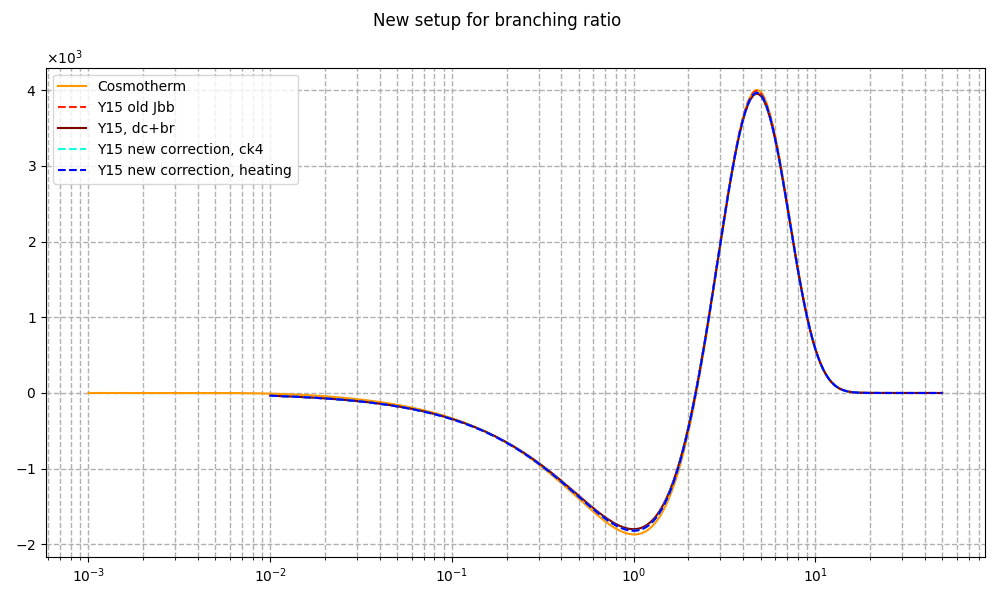

In [ ]:
fig, ax1 = plt.subplots(1, 1, figsize=(10, 6))
fig.suptitle(f"New setup for branching ratio ")

ax1.plot(x,DI_N, label = f"Cosmotherm", color = colors(6))
ax1.plot(xyn_15[0],DIyn_15[0], label = f"Y{Yn[8]} old Jbb", color = colors(7), linestyle = "dashed")
ax1.plot(xyn1[8],DIyn1[8], label = f"Y{Yn[8]}, dc+br", color = colors(i))
ax1.plot(xyn_15_ck4[0],DIyn_15_ck4[0]-corr_ck4(xyn_15_ck4[0]), label = f"Y{Yn[8]} new correction, ck4", color = colors(3), linestyle = "dashed")
ax1.plot(xyn_15_heat[0],DIyn_15_heat[0]-corr_heat(xyn_15_heat[0]), label = f"Y{Yn[8]} new correction, heating", color = colors(1), linestyle = "dashed")



#ax1.plot(x,DI_N, label = "CosmoTherm", color= "pink")
#ax1.plot(x,M(x)*mu*1e26, label = "mu distortion", color = "gray", linestyle = "dashed")

ax1.set_xscale('log')
#ax1.set_xlim([1e-2, 1e2])
#ax1.set_ylabel("$\Delta I_{N}$ [Jy/sr]")*
#ax1.set_xlabel("x")
#ax1.set_title("All $\Delta$ I_N curves")
ax1.grid(True, which = 'both',  linestyle='--', linewidth=1)

ax1.legend()



#ax2.set_xscale('log')
##ax2.set_xlim([1e-4, 50])
##ax2.set_ylim([-2.3e-3, 1.1e-2])
##ax2.set_ylabel("$\Delta$ T / T")
##ax2.set_xlabel("x")
#ax2.grid(True, which = 'both',  linestyle='--', linewidth=1)
##ax2.legend()

ax1.yaxis.set_major_formatter(ScalarFormatter())    
ax1.ticklabel_format(axis='y', style='sci', scilimits=(0, 0),useMathText=True) #only y axis, it does not work on the log scale
plt.tight_layout()
plt.show()

1) chosmotherm: heating vs ck4, 5e5 and 2e6
2) fit a mu distortion to this --> Jbb comparison
3) check I0 (t0 is wrong) compare to cuso notes + more digits to alpha
4) mu_num < mu_dc


In [ ]:
folder7 = 'outputs/fhm-refined/5e5-onlymu/' 
xyn_mu= []
DIyn_mu= []

#for i in range (len(Yn)):
file_path = os.path.join(folder7, f".dat_ymax15_y_bg.spec")
op = pd.read_csv(file_path, skiprows=1, delimiter=' ', header=None)

xyn_mu.append(op.iloc[:, 0].values)
DIyn_mu.append((op.iloc[:, 1].values)* (2*K**3*T**3)/(vc**2*h_pl**2)*1e26) #unit of measure are different!

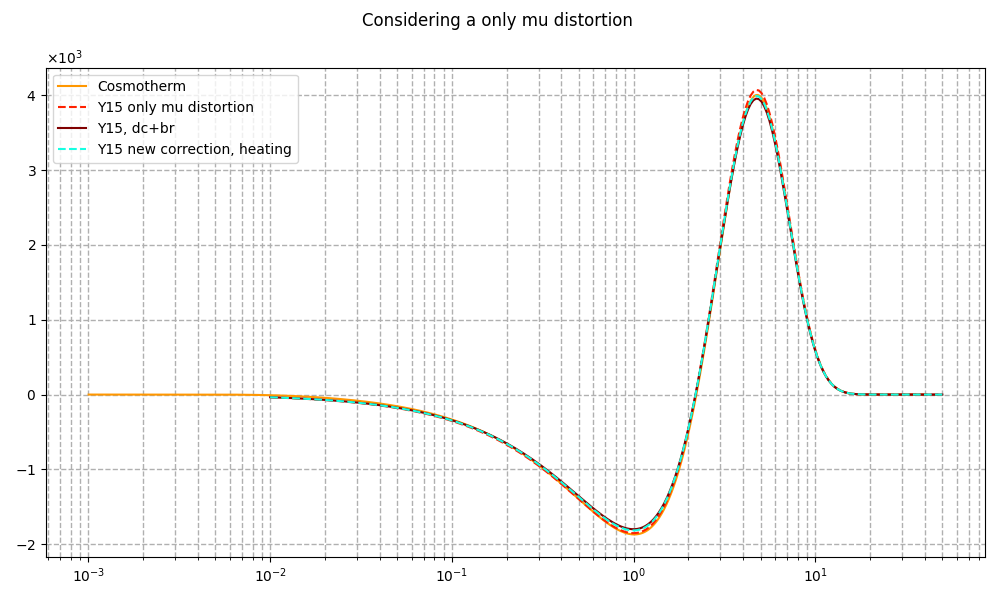

In [ ]:
fig, ax1 = plt.subplots(1, 1, figsize=(10, 6))
fig.suptitle(f"Considering a only mu distortion ")

ax1.plot(x,DI_N, label = f"Cosmotherm", color = colors(6))
ax1.plot(xyn_mu[0],DIyn_mu[0]*1.02, label = f"Y{Yn[8]} only mu distortion", color = colors(7), linestyle = "dashed")
ax1.plot(xyn1[8],DIyn1[8], label = f"Y{Yn[8]}, dc+br", color = colors(i))
ax1.plot(xyn_15_ck4[0],DIyn_15_ck4[0], label = f"Y{Yn[8]} new correction, heating", color = colors(3), linestyle = "dashed")



#ax1.plot(x,DI_N, label = "CosmoTherm", color= "pink")
#ax1.plot(x,M(x)*mu*1e26, label = "mu distortion", color = "gray", linestyle = "dashed")

ax1.set_xscale('log')
#ax1.set_xlim([1e-2, 1e2])
#ax1.set_ylabel("$\Delta I_{N}$ [Jy/sr]")*
#ax1.set_xlabel("x")
#ax1.set_title("All $\Delta$ I_N curves")
ax1.grid(True, which = 'both',  linestyle='--', linewidth=1)

ax1.legend()



#ax2.set_xscale('log')
##ax2.set_xlim([1e-4, 50])
##ax2.set_ylim([-2.3e-3, 1.1e-2])
##ax2.set_ylabel("$\Delta$ T / T")
##ax2.set_xlabel("x")
#ax2.grid(True, which = 'both',  linestyle='--', linewidth=1)
##ax2.legend()

ax1.yaxis.set_major_formatter(ScalarFormatter())    
ax1.ticklabel_format(axis='y', style='sci', scilimits=(0, 0),useMathText=True) #only y axis, it does not work on the log scale
plt.tight_layout()
plt.show()